# 서포트 벡터 머신

퍼셉트론은 가장 단순하고 빠른 판별 함수 기반 분류 모형이지만 판별 경계선(decision hyperplane)이 유니크하게 존재하지 않는다는 특징이 있다. 서포트 벡터 머신(SVM: support vector machine)은 퍼셉트론 기반의 모형에 가장 안정적인 판별 경계선을 찾기 위한 제한 조건을 추가한 모형이라고 볼 수 있다. 

<img src="https://datascienceschool.net/upfiles/3e0a11567a154fc6a5e25010a68b5872.png" style="width: 100%;">

그림 45.2 : 서포트벡터머신

## 서포트와 마진

다음과 같이 $N$개의 학습용 데이터가 있다고 하자.

$$ (x_1, y_1), (x_2, y_2), \ldots, (x_i, y_i), \ldots, (x_N, y_N) $$

판별함수모형에서 $y$는 $+1$, $-1$ 두 개의 값을 가진다

$$ y = \begin{cases} +1 \\ -1 \end{cases} $$

$x$ 데이터 중에서 $y$값이 +1인 데이터를 $x_+$, $y$값이 -1인 데이터를 $x_-$라고 하자.

판별함수 모형에서 직선인 판별 함수 $f(x)$는 다음과 같은 수식으로 나타낼 수 있다.

$$ f(x) = w^Tx-w_0 $$ 

판별함수의 정의에 따라 $y$ 값이 $+1$인 그 데이터 $x_+$에 대한 판별함수 값은 양수가 된다.

$$ f(x_+) = w^Tx_+ - w_0 > 0 $$

반대로 $y$ 값이 $-1$인 그 데이터 $x_-$에 대한 판별함수 값은 음수가 된다.

$$ f(x_-) = w^Tx_- - w_0 < 0 $$

$y$ 값이 $+1$인 데이터 중에서 판별 함수의 값이 가장 작은 데이터를 $x^+$라고 하고  $y$ 값이 $-1$인 데이터 중에서 판별함수의 값이 가장 큰 데이터를 $x^-$라고 하자. 이 데이터들은 각각의 클래스에 속한 데이터 중에서 가장 경계선에 가까이 붙어있는 최전방(most front)의 데이터들이다. 이러한 데이터를 **서포트(support)** 혹은 **서포트 벡터(support vector)**라고 한다. 물론 이 서포트에 대해서도 부호 조건은 만족되어야 한다.

$$ f(x^+) = w^Tx^+ - w_0 > 0 $$

$$ f(x^-) = w^Tx^- - w_0 < 0 $$


서포트에 대한 판별 함수의 값 $f(x^+)$, $f(x^-)$ 값은 부호 조건만 지키면 어떤 값이 되어도 괜찮다. 따라서 다음과 같은 조건을 만족하도록 판별 함수를 구한다.

$$ f(x^+) = w^T x^{+} - w_0 = +1 $$

$$ f(x^-) = w^T x^{-} - w_0 = -1 $$

<img src="https://datascienceschool.net/upfiles/d109dea1e0fa40f9901dbbeff456230f.png" style="width: 100%;">

그림 18.6.3 : 서포트벡터의 판별함수 값



이렇게 되면 모든 $x_+$, $x_+$ 데이터에 대해 판별함수의 값의 절대값이 1보다 커지므로 다음 부등식이 성립한다.

$$ w^Tx_+ - w_o \geq 1 $$

$$ w^Tx_- - w_o \leq -1 $$


판별 경계선 $w^T x - w_0=0$ 과 점 $x^{+}$, $x^{-}$ 사이의 거리는 다음과 같이 계산할 수 있다.

$$ \dfrac{w^T x^{+} - w_0}{\| w \|} = \dfrac{1}{\| w \|} $$

$$ -\dfrac{w^T x^{-} - w_0}{\| w \|} = \dfrac{1}{\| w \|}  $$

이 거리의 합을 마진(margin)이라고 하며 마진값이 클 수록 더 경계선이 안정적이라고 볼 수 있다. 그런데 위에서 정한 스케일링에 의해 마진은 다음과 같이 정리된다.

$$ \dfrac{w^T x^{+} - w_0}{\| w \|}  -\dfrac{w^T x^{-} - w_0}{\| w \|} = \dfrac{2}{\| w \|}$$

마진 값이 최대가 되는 경우는 $\| w \|$ 즉, $\| w \|^2$가 최소가 되는 경우와 같다. 즉 다음과 같은 목적함수를 최소화하면 된다.

$$ L = \dfrac{1}{2} ||w||^2 = \dfrac{1}{2} w^T w $$

또한 모든 표본 데이터에 대해 분류는 제대로 되어야 하므로 모든 데이터 $x_i, y_i \; ( i = 1, \ldots, N)$에 대해 다음 조건을 만족해야 한다.
위에서 스케일링을 사용하여 모든 데이터에 대해 $f(x_i) = w^Tx_i - w_o$ 가 1보다 크거나 -1보다 작게 만들었다는 점을 이용한다.

$$ y_i \cdot f(x_i) = y_i \cdot( w^Tx_i - w_o) \geq 1 \;\;\; ( i = 1, \ldots, N )$$

$$  y_i \cdot ( w^Tx_i - w_o) - 1 \geq 0 \;\;\; ( i = 1, \ldots, N )$$

라그랑주 승수법을 사용하면 최소화 목적함수를 다음과 같이 고치면 된다.

$$ L = \dfrac{1}{2} w^T w - \sum_{i=1}^N a_i \{ y_i \cdot ( w^Tx_i - w_o) - 1 \} $$

여기에서 $a_i$은 각각의 부등식에 대한 라그랑주 승수이다.

이 최적화 문제를 풀어 $w$, $w_0$, $a$를 구하면 판별함수를 얻을 수 있다. 

KKT(Karush–Kuhn–Tucker) 조건에 따르면 부등식 제한 조건이 있는 경우에는 등식 제한조건을 가지는 라그랑주 승수 방법과 비슷하지만 $i$번째 부등식이 있으나 없으나 답이 같은 경우에는 라그랑지 승수의 값이 $a_i=0$이 된다. 이 경우는 판별함수의 값 $w^Tx_i - w_o$이 $-1$보다 작거나 $1$보다 큰 경우이다.

$$ y_i(w^Tx_i - w_o) - 1  > 0 $$

학습 데이터 중에서 최전방 데이터인 서포트 벡터가 아닌 모든 데이터들에 대해서는 이 조건이 만족되므로 서포트 벡터가 아닌 데이터는 라그랑지 승수가 0이라는 것을 알 수 있다.

$$ a_i = 0 \;\; \text{if} \;\; x_i \notin \{ x^{+}, x^{-} \} $$

## 듀얼 형식

최적화 조건은 목적함수 $L$을 $w$, $w_0$로 미분한 값이 0이 되어야 하는 것이다.
$$ 
\dfrac{\partial L}{\partial w} = 0
$$

$$ 
\dfrac{\partial L}{\partial w_0} = 0
$$


이 식을 풀어서 정리하면 다음과 같아진다.

$$ 
\begin{eqnarray}
\dfrac{\partial L}{\partial w} 
&=& \dfrac{\partial}{\partial w} \left( \dfrac{1}{2} w^T w \right) - 
    \dfrac{\partial}{\partial w} \sum_{i=1}^N \left( a_i y_i w^Tx_i - a_i y_i w_o - a_i \right) \\
&=& w - \sum_{i=1}^N  a_i y_i x_i \\
&=& 0
\end{eqnarray}
$$

$$ 
\begin{eqnarray}
\dfrac{\partial L}{\partial w_0} 
&=& \dfrac{\partial}{\partial w_0} \left( \dfrac{1}{2} w^T w \right) - 
    \dfrac{\partial}{\partial w_0} \sum_{i=1}^N \left( a_i y_i w^Tx_i - a_i y_i w_o - a_i \right) \\
&=& \sum_{i=1}^N  a_i y_i \\
&=& 0
\end{eqnarray}
$$

즉, 

$$ 
w = \sum_{i=1}^N a_i y_i x_i
$$

$$ 
0 = \sum_{i=1}^N a_i y_i 
$$

이 두 수식을 원래의 목적함수에 대입하여 $w$, $w_0$을 없애면 다음과 같다.

$$
\begin{eqnarray}
L
&=& \dfrac{1}{2} w^T w - \sum_{i=1}^N a_i \{ y_i \cdot ( w^Tx_i - w_o) - 1 \}  \\
&=& \dfrac{1}{2} \left( \sum_{i=1}^N a_i y_i x_i \right)^T \left( \sum_{j=1}^N a_j y_j x_j \right) - 
    \sum_{i=1}^N a_i \left\{ y_i \cdot \left( \left( \sum_{j=1}^N a_j y_j x_j \right)^Tx_i - w_o \right) - 1 \right\}  \\
&=& \dfrac{1}{2} \sum_{i=1}^N \sum_{j=1}^N a_i a_j y_i y_j x_i^T x_j - 
    \sum_{i=1}^N \sum_{j=1}^N a_i a_j y_i y_j x_i^T x_j +
    w_0 \sum_{i=1}^N a_i y_i + \sum_{i=1}^N a_i   \\
&=& \sum_{i=1}^N a_i - \dfrac{1}{2}\sum_{i=1}^N\sum_{j=1}^N a_i a_j y_i y_j x_i^T x_j
\end{eqnarray}
$$


즉,

$$
L = \sum_{i=1}^N a_i - \dfrac{1}{2}\sum_{i=1}^N\sum_{j=1}^N a_i a_j y_i y_j x_i^T x_j
$$

이 때 $a$는 다음 조건을 만족한다.

$$
\sum_{i=1}^N a_i y_i = 0
$$

$$
a_i \geq 0 \;\;\;  ( i = 1, \ldots, N )
$$

이 문제는 $w$를 구하는 문제가 아니라 $a$만을 구하는 문제로 바뀌었으므로 듀얼형식(dual form)이라고 한다. 듀얼형식으로 바꾸면 수치적으로 박스(Box)제한 조건이 있는 이차프로그래밍(QP; quadratic programming) 문제가 되므로 원래의 문제보다는 효율적으로 풀 수 있다.

듀얼형식 문제를 풀어 함수 $L$ 를 최소화하는 $a$를 구하면 예측 모형을 다음과 같이 쓸 수 있다.

$$
f(x) = w^T x - w_0 = \sum_{i=1}^N a_i y_i x_i^T x - w_0
$$


$w_0$는

$$ w_0 = w^T x^{+} - 1 $$

또는 

$$ w_0 = w^T x^{-} + 1 $$

또는 

$$ w_0 = \dfrac{1}{2} w^T (x^+ + x^{-}) $$


로 구한다.

라그랑주 승수 값이 0 즉, $a_i = 0$ 이면 해당 데이터는 예측 모형, 즉 $w$ 계산에 아무런 기여를 하지 않으므로 위 식을 실제로는 다음과 같다.

$$
f(x) = a^+ x^T x^+ - a^- x^T x^- - w_0 
$$

여기에서 $x^T x^+$ 는 $x$와 $x^+$사이의 (코사인)유사도, $x^T x^-$ 는 $x$와 $x^-$사이의 (코사인)유사도이므로 결국 두 서포트 벡터와의 유사도를 측정해서 값이 큰 쪽으로 판별하게 된다.

## Scikit-Learn의 서포트 벡터 머신

Scikit-Learn의 ``svm`` 서브페키지는 서포트 벡터 머신 모형인 `SVC` (Support Vector Classifier) 클래스를 제공한다. 

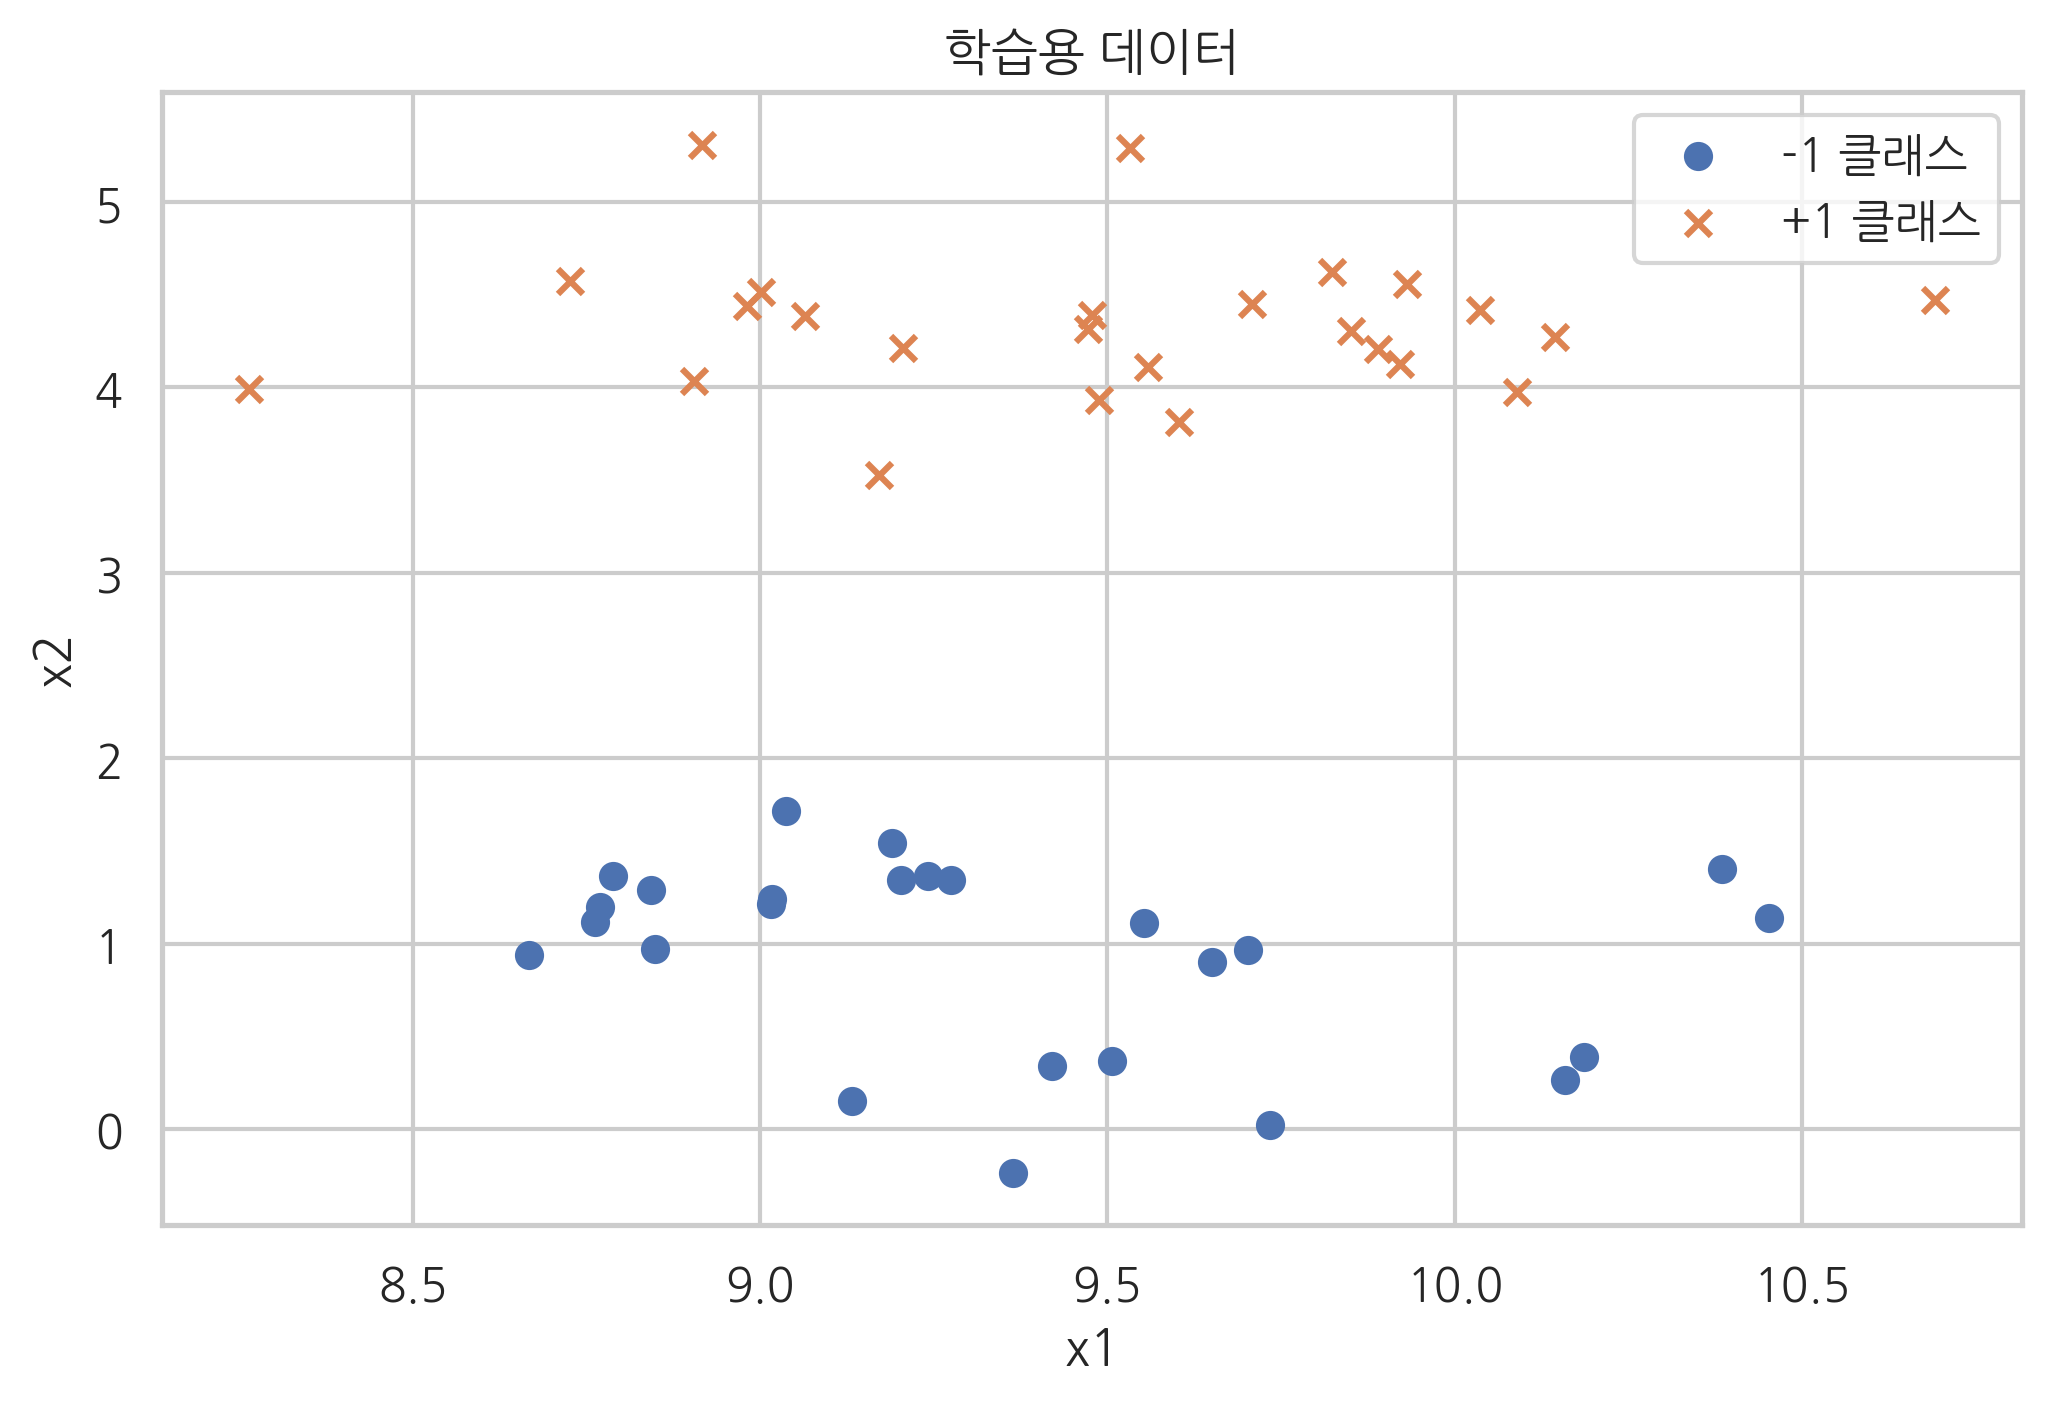

In [1]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y = 2 * y - 1

plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("학습용 데이터")
plt.show()

`SVC` 클래스는 커널(kernel)을 선택하는 인수 `kernel`과 슬랙변수 가중치(slack variable weight)를 선택하는 인수 `C`를 받는데 지금까지 공부한 서포트 벡터 머신을 사용하려면 인수를 다음처럼 넣어준다. 이 인수들에 대해서는 곧 설명한다.

```
SVC(kernel='linear', C=1e10)
```

In [2]:
from sklearn.svm import SVC
model = SVC(kernel='linear', C=1e10).fit(X, y)

`SVC`를 사용하여 모형을 구하면 다음과 같은 속성값을 가진다.

* `n_support_`: 각 클래스의 서포트의 개수
* `support_`: 각 클래스의 서포트의 인덱스
* `support_vectors_`: 각 클래스의 서포트의 x 값. $x^{+}$와 $x^{-}$
* `coef_`: $w$ 벡터
* `intercept_`: $-w_0$
* `dual_coef_`: 각 원소가 $a_i \cdot y_i$로 이루어진 벡터

In [3]:
model.n_support_

array([1, 1], dtype=int32)

In [4]:
model.support_

array([42,  1], dtype=int32)

In [5]:
model.support_vectors_

array([[9.03715314, 1.71813465],
       [9.17124955, 3.52485535]])

In [6]:
y[model.support_]

array([-1,  1])

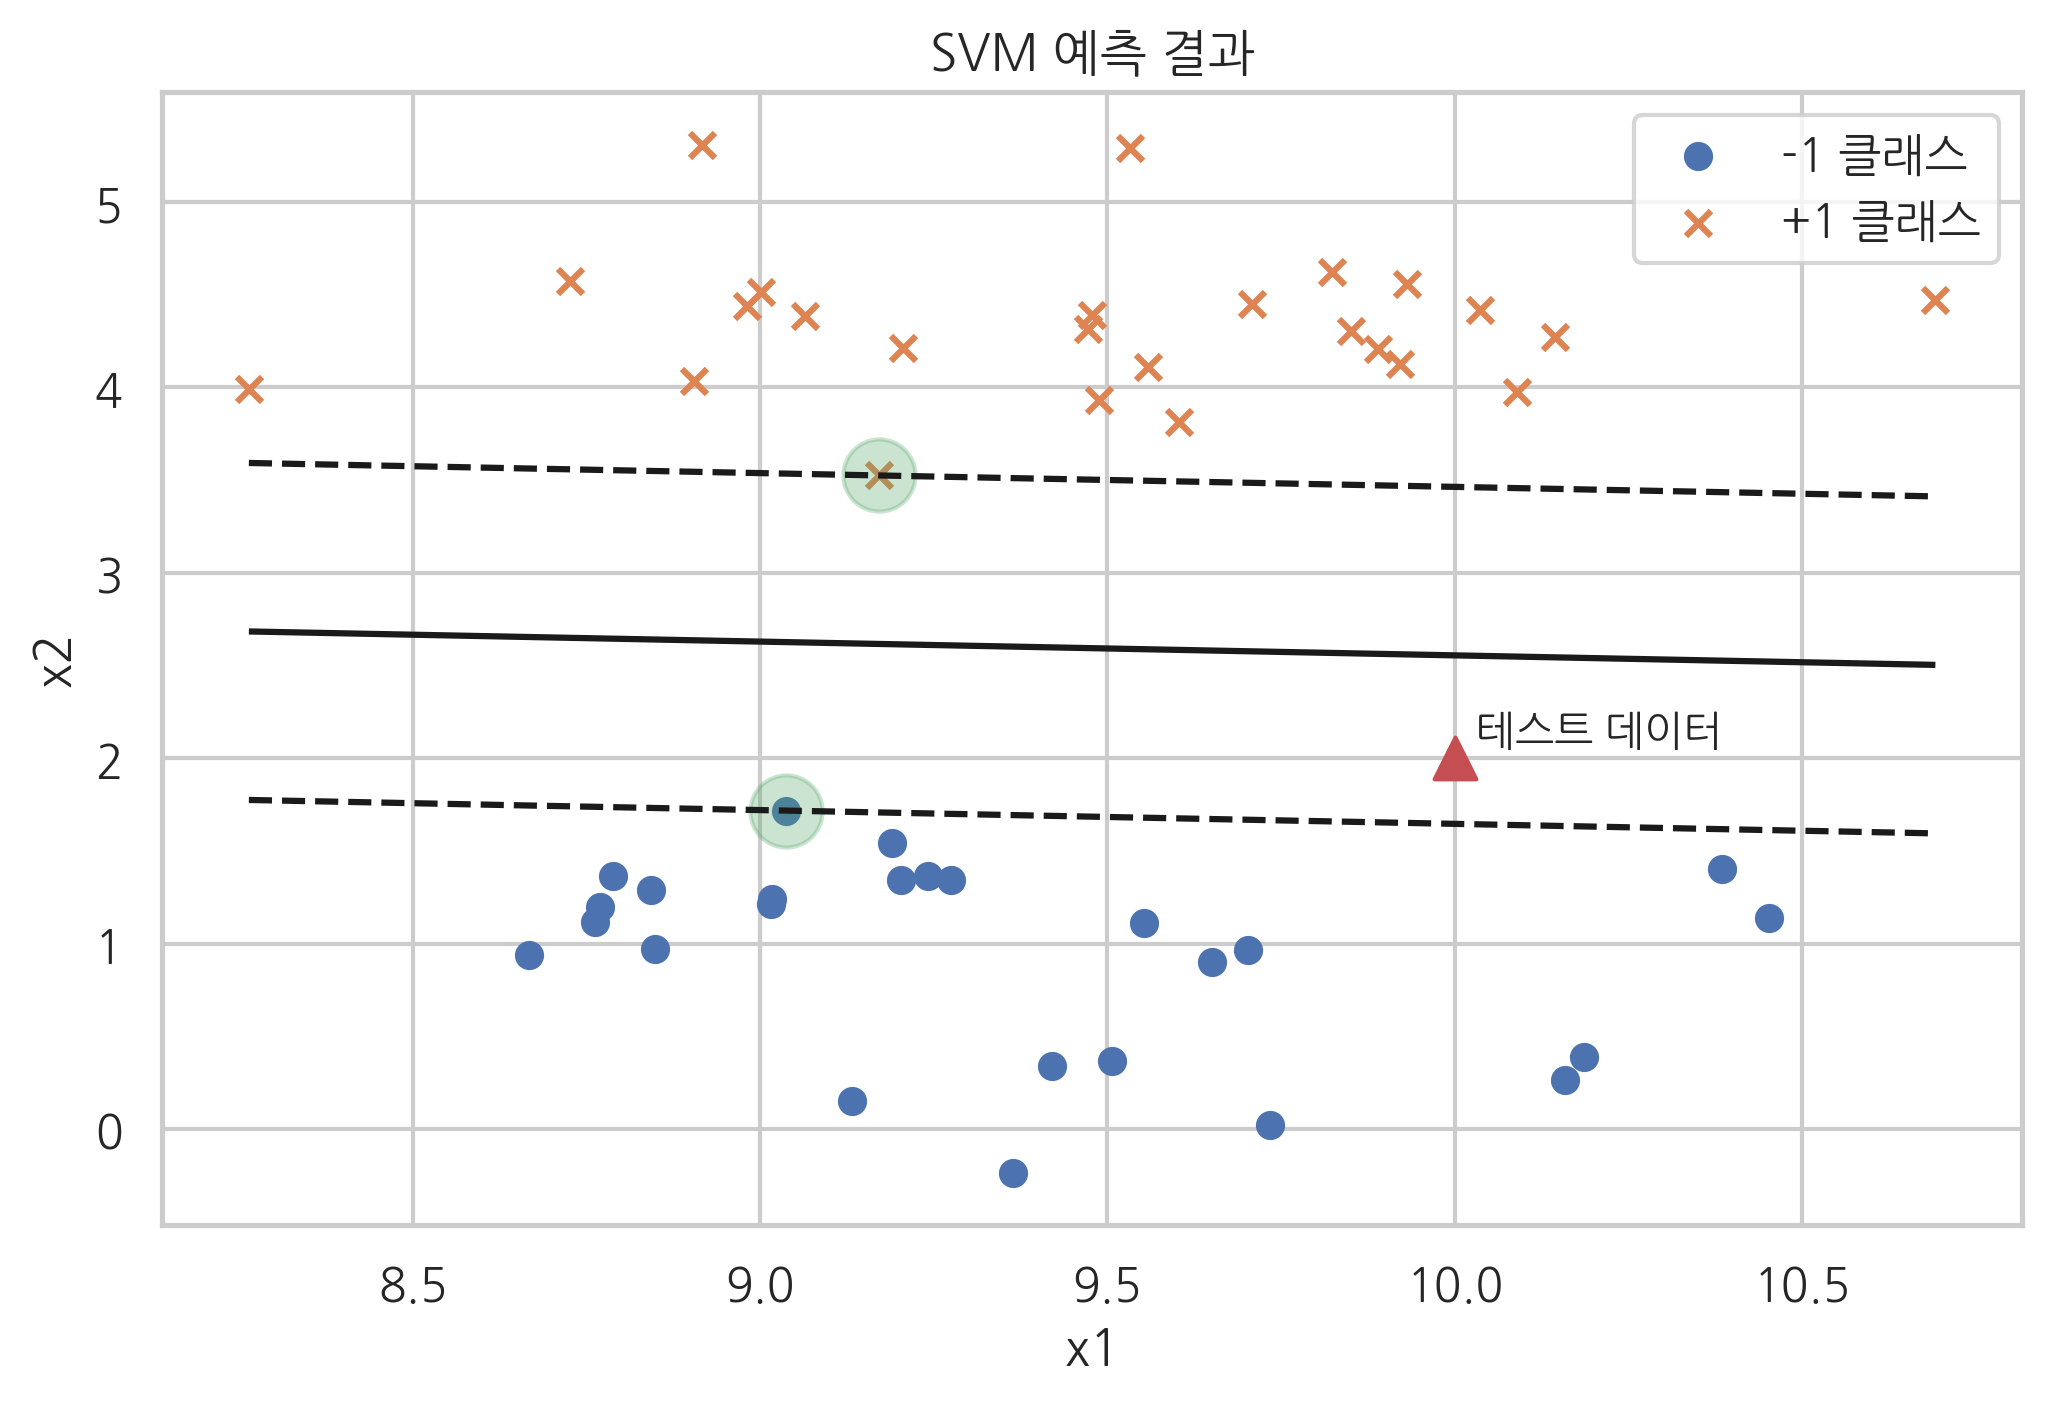

In [7]:
xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = model.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ['dashed', 'solid', 'dashed']
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker='o', label="-1 클래스")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker='x', label="+1 클래스")
plt.contour(X1, X2, Z, levels, colors='k', linestyles=linestyles)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, alpha=0.3)

x_new = [10, 2]
plt.scatter(x_new[0], x_new[1], marker='^', s=100)
plt.text(x_new[0] + 0.03, x_new[1] + 0.08, "테스트 데이터")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("SVM 예측 결과")

plt.show()

In [8]:
x_new = [10, 2]
model.decision_function([x_new])

array([-0.61101582])

In [9]:
model.coef_.dot(x_new) + model.intercept_

array([-0.61101582])

In [10]:
# dual_coef_ = a_i * y_i
model.dual_coef_

array([[-0.60934379,  0.60934379]])

In [11]:
model.dual_coef_[0][0] * model.support_vectors_[0].dot(x_new) + \
    model.dual_coef_[0][1] * model.support_vectors_[1].dot(x_new) + \
    model.intercept_

array([-0.61101582])

#### 연습 문제 1

붓꽃 문제를 서포트 벡터 머신으로 풀어보자. 다음과 같은 데이터만 사용한 이진 분류 문제로 바꾸어 풀어본다. 위의 예제와 마찬가지로 커널 인수 `kernel`과 슬랙변수 가중치 인수 `C`는 각각 `linear`, `1e10`으로 한다.

* 특징 변수를 꽃받침의 길이와 폭만 사용한다.
* 붓꽃 종을 Setosa와 Versicolour만 대상으로 한다.


In [3]:
from sklearn.datasets import load_iris
iris = load_iris()
X1 = iris.data[:100, :2]
y1 = iris.target[:100]

from sklearn.svm import SVC
model1 = SVC(kernel="linear", C=1e10).fit(X1, y1)

from sklearn.metrics import classification_report
print(classification_report(y1, model1.predict(X1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



## 슬랙변수

만약 데이터가 직선인 판별 경계선으로 나누어지지 않는 즉, 선형분리(linear separable)가 불가능한 경우에는 다음과 같이 슬랙변수(slack variable)를 사용하여 개별적인 오차를 허용할 수 있다.

원래 판별 함수의 값은 클래스 $+1$ 영역의 샘플 $x_+$에 대해 

$$ w^Tx_+ - w_0 \geq 1 $$  

클래스 $-1$ 영역의 샘플 $x_-$에 대해 
 
$$ w^Tx_- - w_0 \leq -1 $$

이어야 한다.

양수인 슬랙변수 $\xi \geq 0 $를 사용하면 이 조건을 다음과 같이 완화할 수 있다.


$$ w^Tx_+ - w_0 \geq +1-\xi_i $$

$$ w^Tx_- - w_0 \leq -1+\xi_i $$

즉,

$$ y(w^Tx_- - w_0) \leq -1+\xi_i $$

이 된다.

모든 슬랙변수는 0보다 같거나 크다.

$$ \xi_i \geq 0 \;\;\; (i=1, \ldots, N) $$


위의 부등식 조건을 모두 고려한 최적화 목적함수는 다음과 같아진다.

$$ 
L = \dfrac{1}{2} ||w||^2 - \sum_{i=1}^N a_i (y_i \cdot ( w^Tx_i - w_o) - 1 + \xi_i ) - \sum_{i=1}^N \mu_i \xi_i  + C \sum_{i=1}^N \xi_i    
$$

위 식에서 $C \sum_{i=1}^N \xi_i$ 항은 슬랙변수의 합이 너무 커지지 않도록 제한하는 역할을 한다.

<img src="https://datascienceschool.net/upfiles/ee724b3f4cf344278d0790eb8807630c.png" style="width: 100%;">

그림 18.6.3 : $C$ 값에 따른 판별 함수의 변화

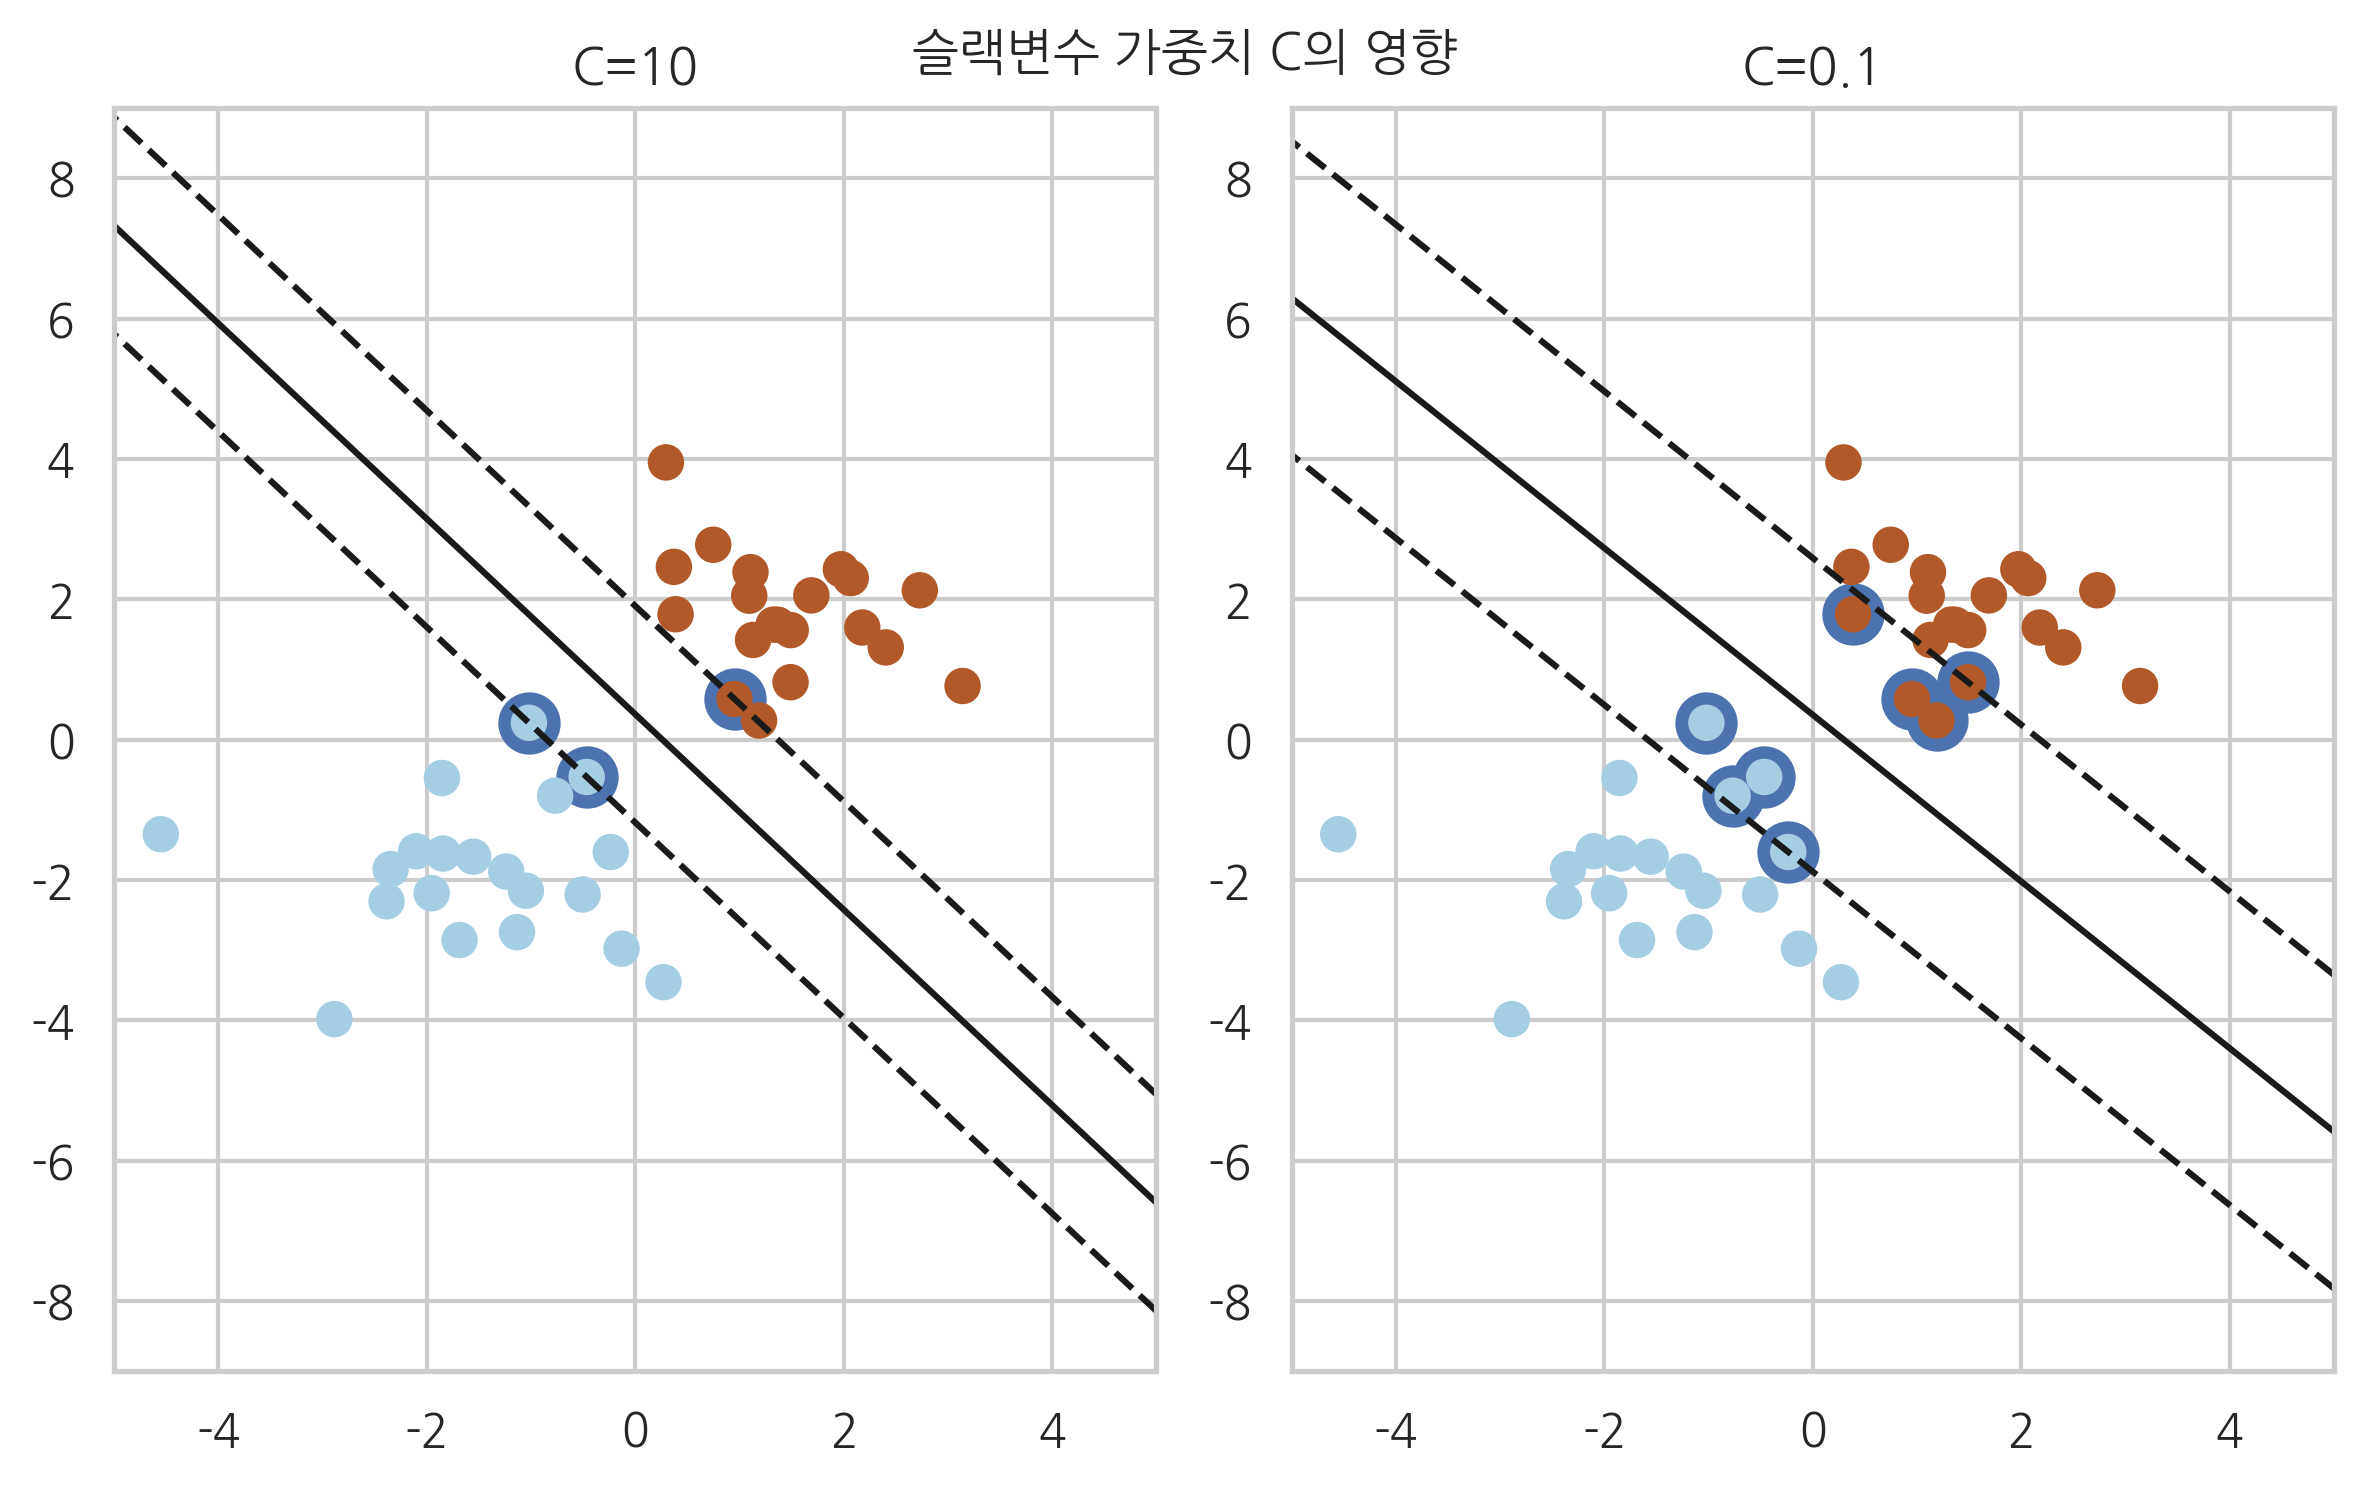

In [12]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [-1] * 20 + [1] * 20

plotnum = 1
for name, penalty in (('C=10', 10), ('C=0.1', 0.1)):
    clf = SVC(kernel='linear', C=penalty).fit(X, Y)
    xx = np.linspace(-5, 5)

    x_jin = -5
    x_jax = 5
    y_jin = -9
    y_jax = 9
    XX, YY = np.mgrid[x_jin:x_jax:200j, y_jin:y_jax:200j]

    levels = [-1, 0, 1]
    linestyles = ['dashed', 'solid', 'dashed']
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    
    plt.subplot(1, 2, plotnum)
    plt.contour(XX, YY, Z, levels, colors='k', linestyles=linestyles)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120, linewidth=4)
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=60, linewidth=1, cmap=plt.cm.Paired)
    plt.xlim(x_jin, x_jax)
    plt.ylim(y_jin, y_jax)
    plt.title(name)

    plotnum += 1

plt.suptitle("슬랙변수 가중치 C의 영향")
plt.tight_layout()
plt.show()

#### 연습 문제 2

붓꽃 문제를 서포트 벡터 머신으로 풀어보자. 다음과 같은 데이터만 사용한 이진 분류 문제로 바꾸어 풀어본다. 위의 예제와 마찬가지로 커널 인수 `kernel`는 각각 `linear`로 한다. 슬랙변수 가중치 인수 `C`를 여러가지 값으로 바꾸어 보면서 서포트가 어떻게 바뀌는지 살펴본다.

* 특징 변수를 꽃잎의 길이와 폭만 사용한다.
* 붓꽃 종을 Virginica와 Versicolour만 대상으로 한다.


In [6]:
from sklearn.datasets import load_iris
iris = load_iris()
X2 = iris.data[50:, 2:]
y2 = iris.target[50:] - 1

from sklearn.svm import SVC
model1 = SVC(kernel="linear", C=1e10).fit(X2, y2)

from sklearn.metrics import classification_report
print(classification_report(y2, model1.predict(X2)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        50
           1       1.00      0.90      0.95        50

    accuracy                           0.95       100
   macro avg       0.95      0.95      0.95       100
weighted avg       0.95      0.95      0.95       100



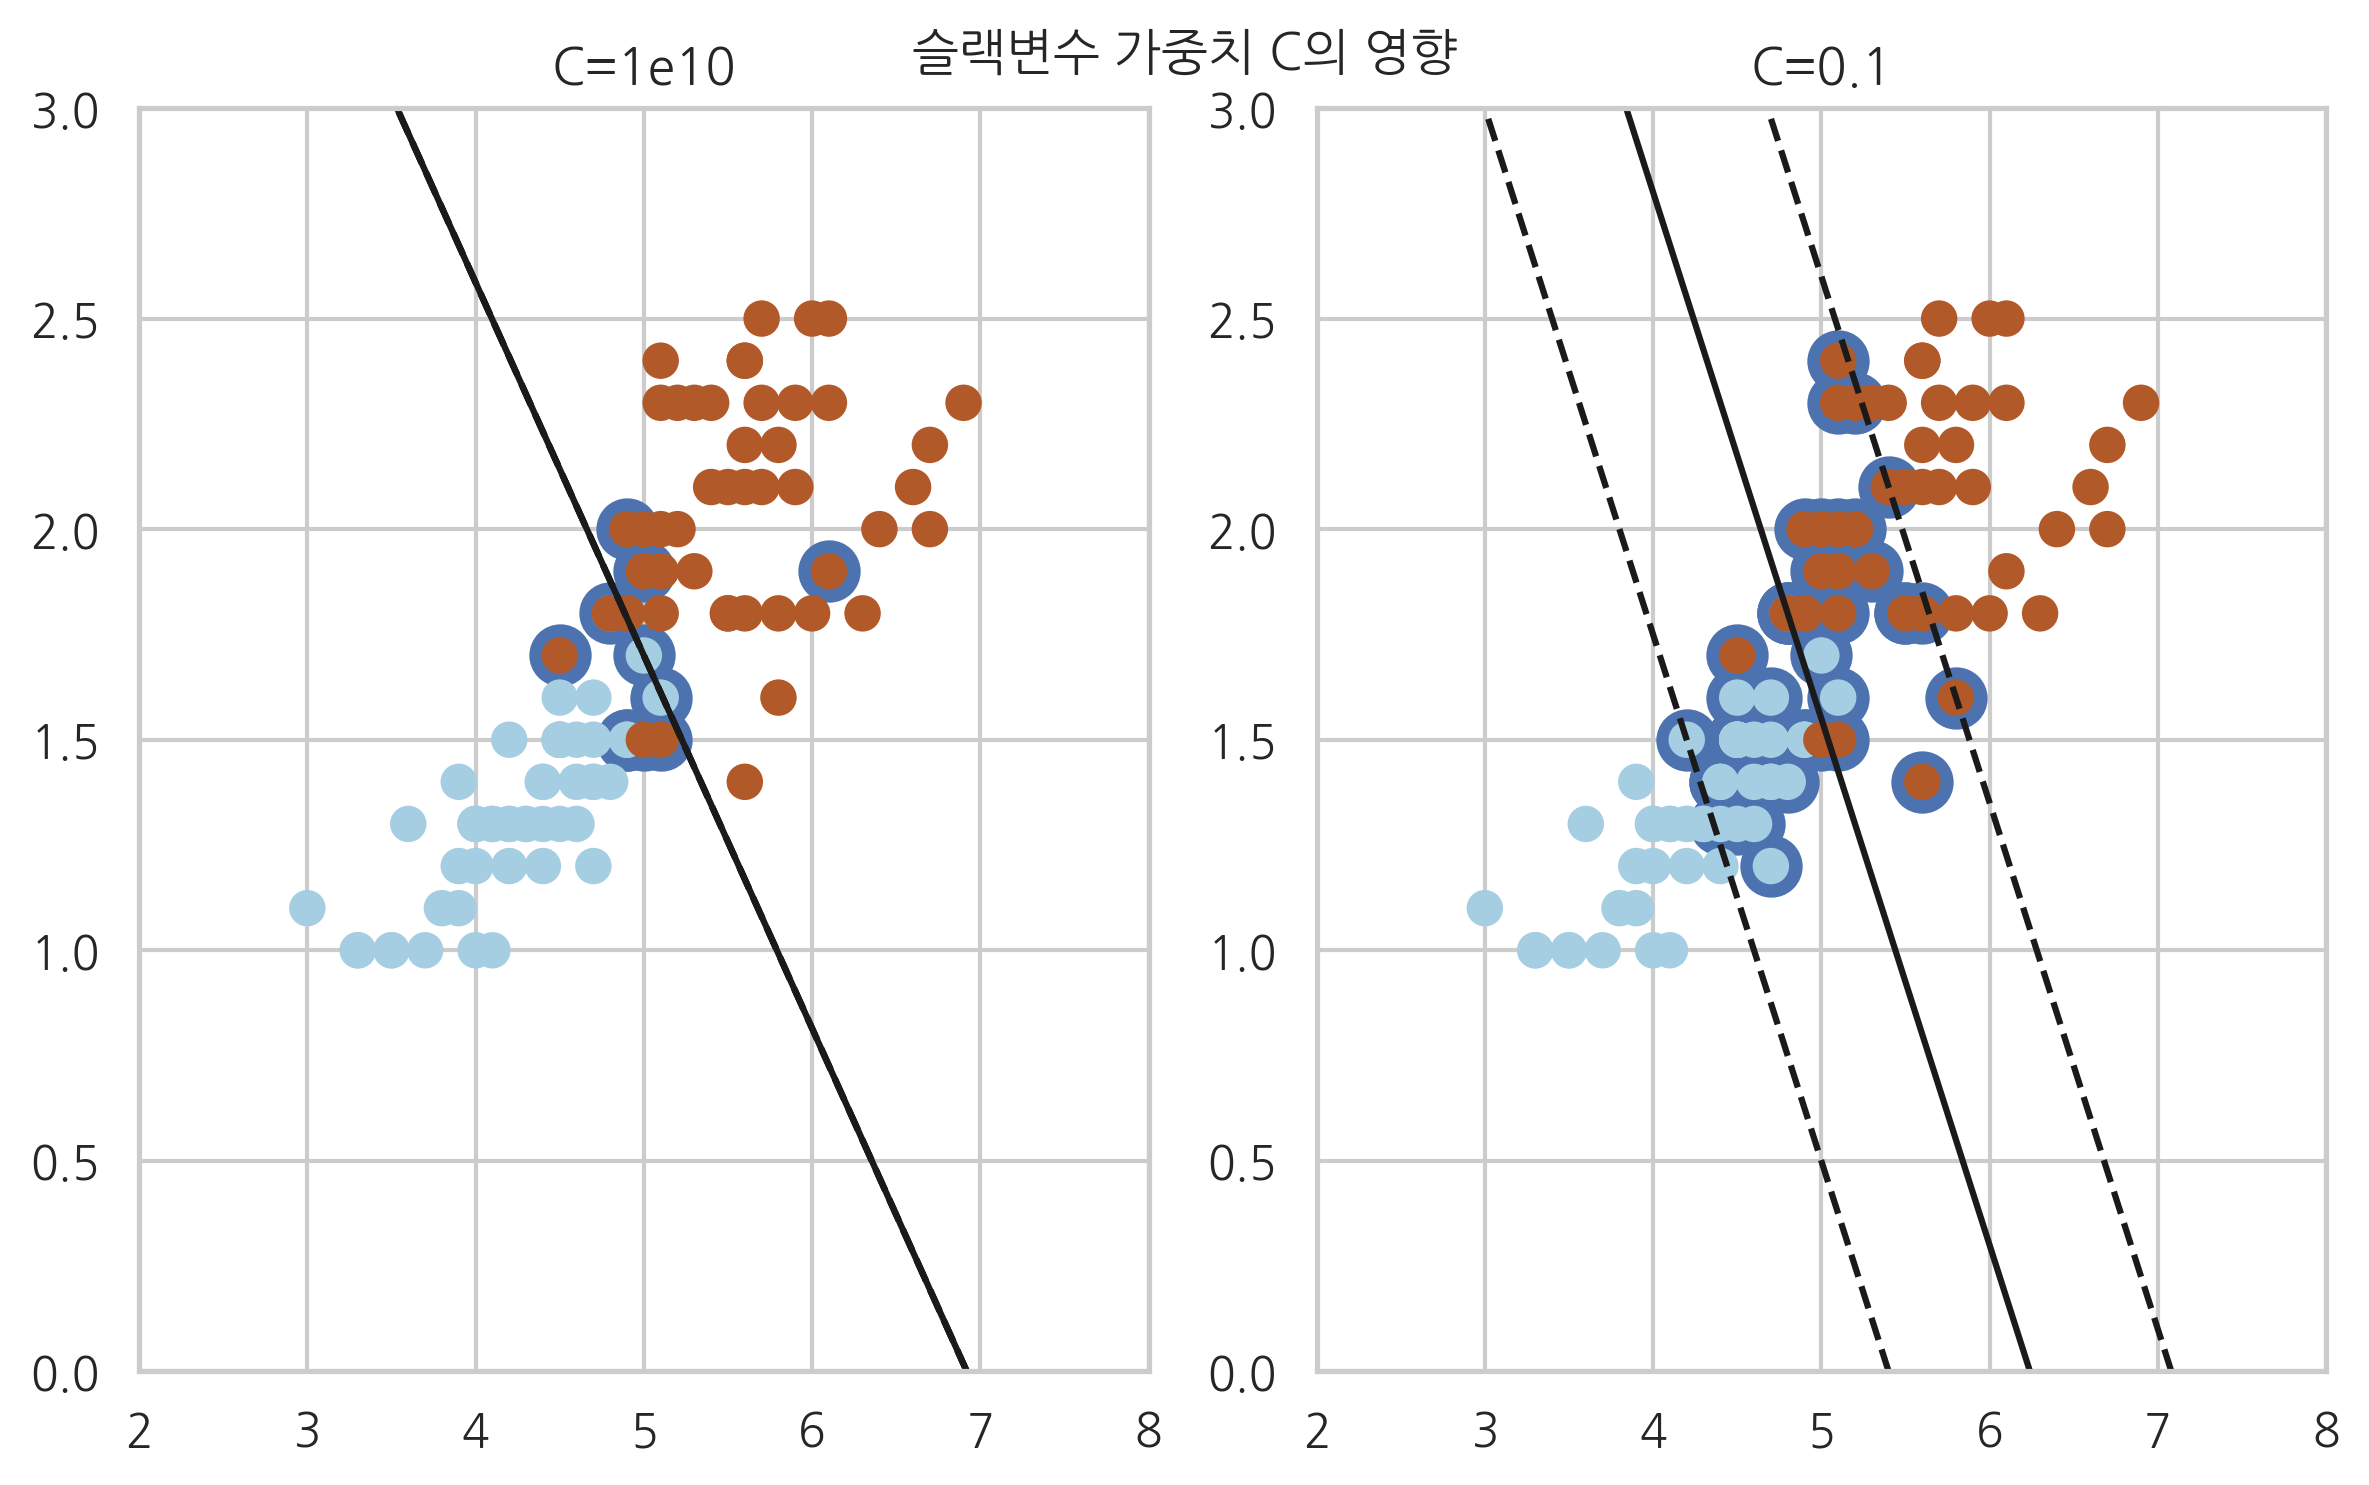

In [14]:
plotnum = 1
for name, penalty in (('C=1e10', 1e10), ('C=0.1', 0.1)):
    clf = SVC(kernel='linear', C=penalty).fit(X2, y2)
    xx = np.linspace(2, 8)

    x_jin = 2
    x_jax = 8
    y_jin = 0
    y_jax = 3
    XX, YY = np.mgrid[x_jin:x_jax:200j, y_jin:y_jax:200j]

    levels = [-1, 0, 1]
    linestyles = ['dashed', 'solid', 'dashed']
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    
    plt.subplot(1, 2, plotnum)
    plt.contour(XX, YY, Z, levels, colors='k', linestyles=linestyles)
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120, linewidth=4)
    plt.scatter(X2[:, 0], X2[:, 1], c=y2, s=60, linewidth=1, cmap=plt.cm.Paired)
    plt.xlim(x_jin, x_jax)
    plt.ylim(y_jin, y_jax)
    plt.title(name)

    plotnum += 1

plt.suptitle("슬랙변수 가중치 C의 영향")
plt.tight_layout()
plt.show()

#### 연습 문제 3

MNIST Digit Image 분류 문제를 서포트 벡터 머신으로 풀어보자. 

## 얼굴 이미지 인식

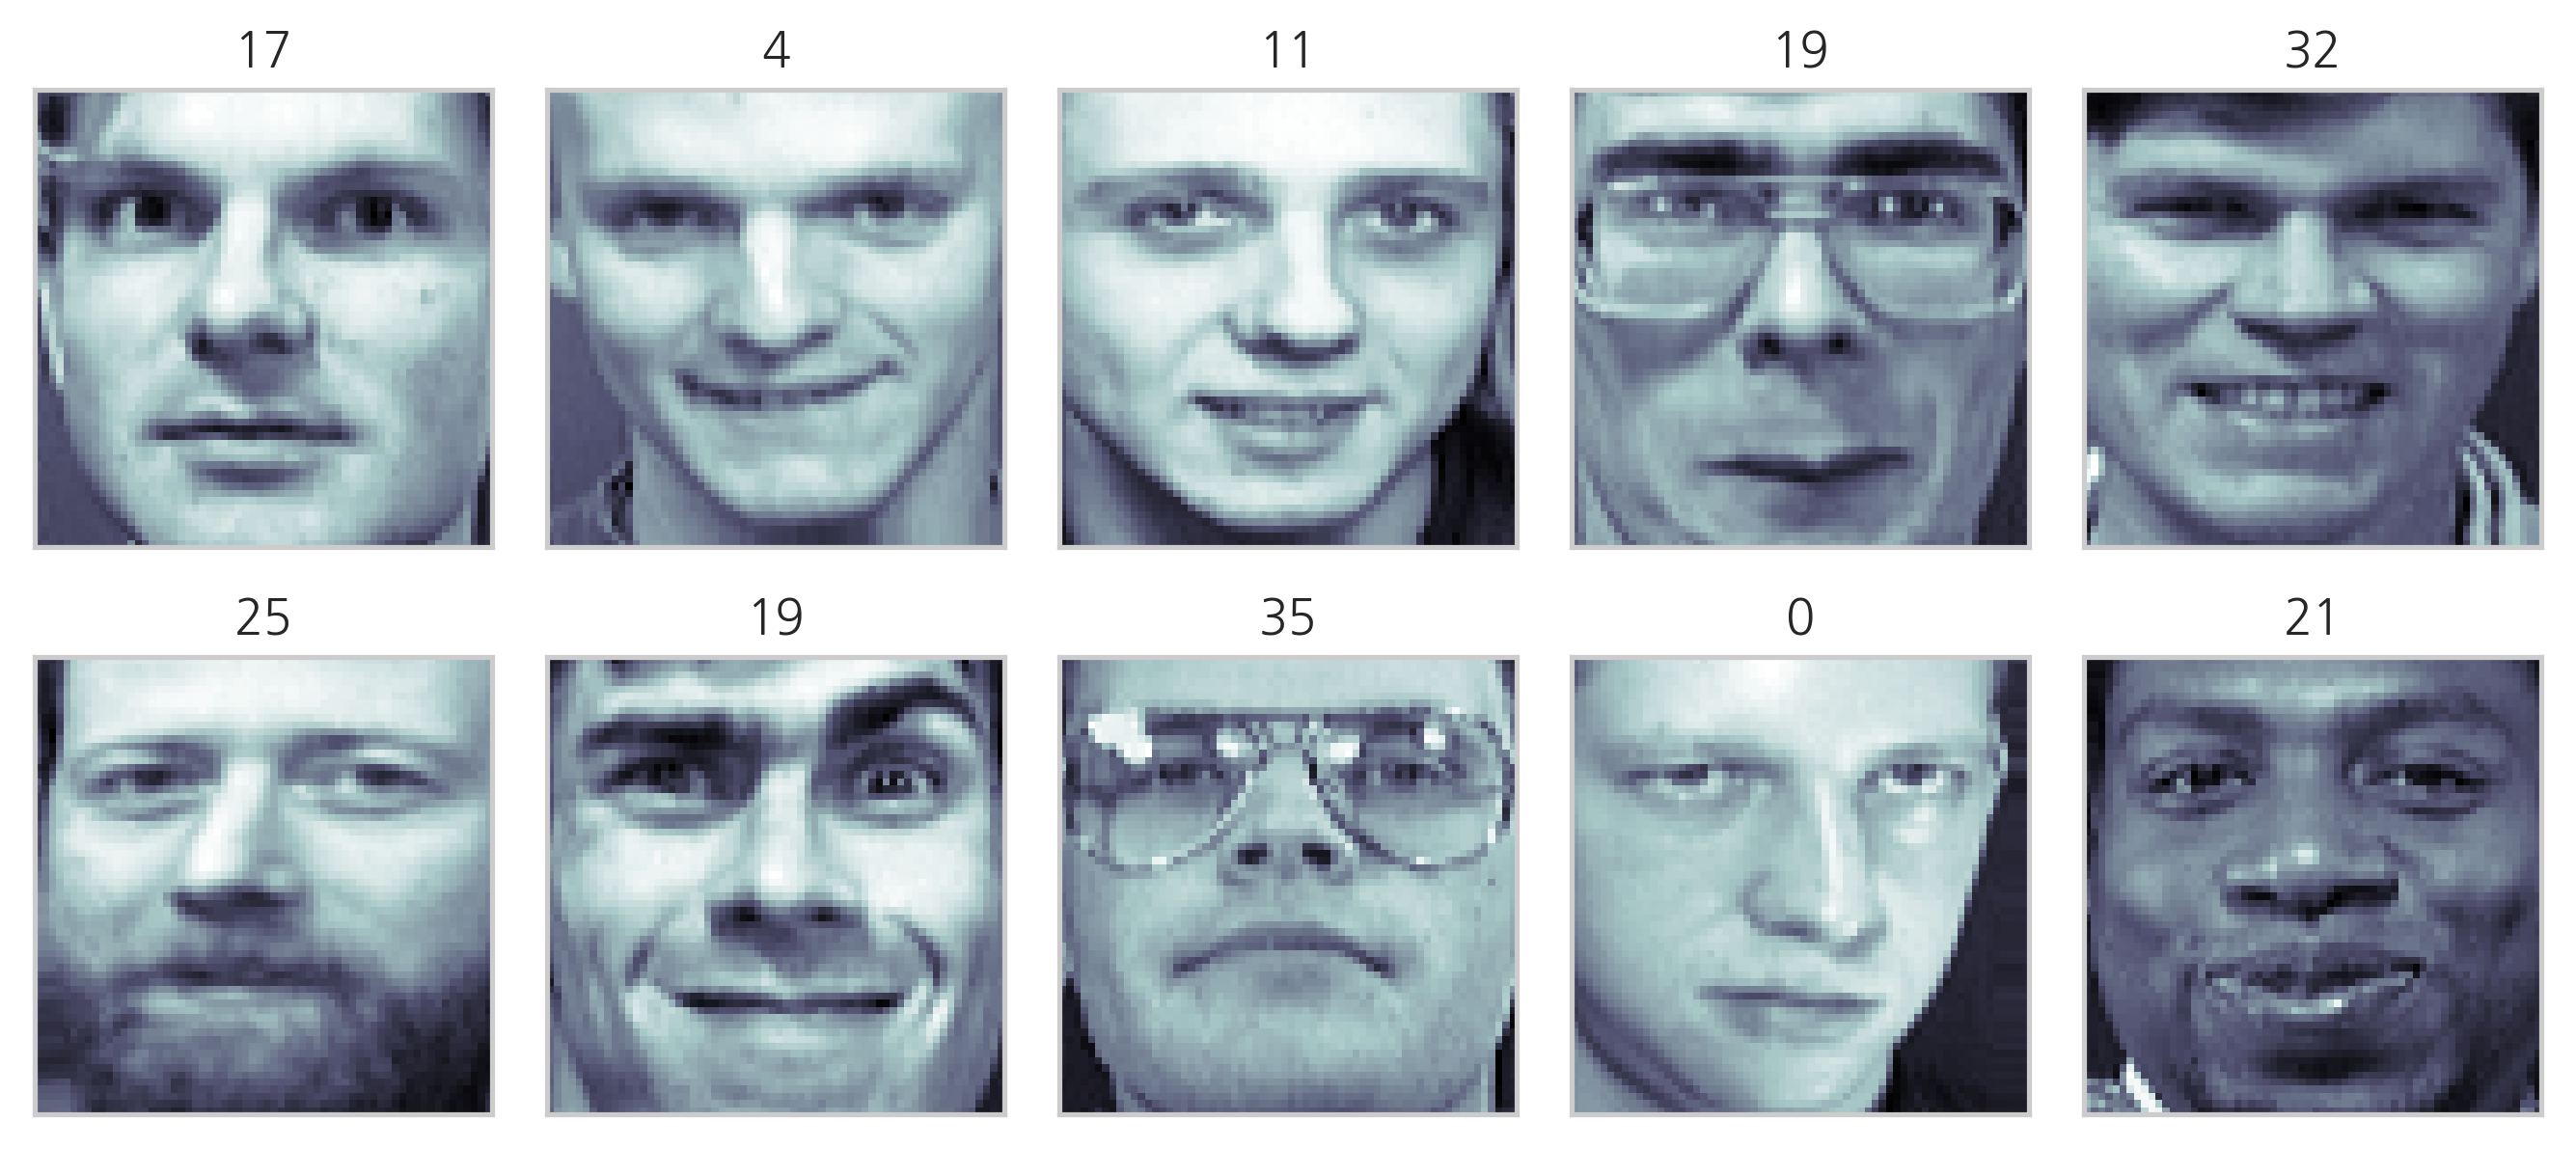

In [13]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

N = 2
M = 5
np.random.seed(0)
fig = plt.figure(figsize=(9, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(faces.data)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(faces.images[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(faces.target[k])
plt.tight_layout()
plt.show()

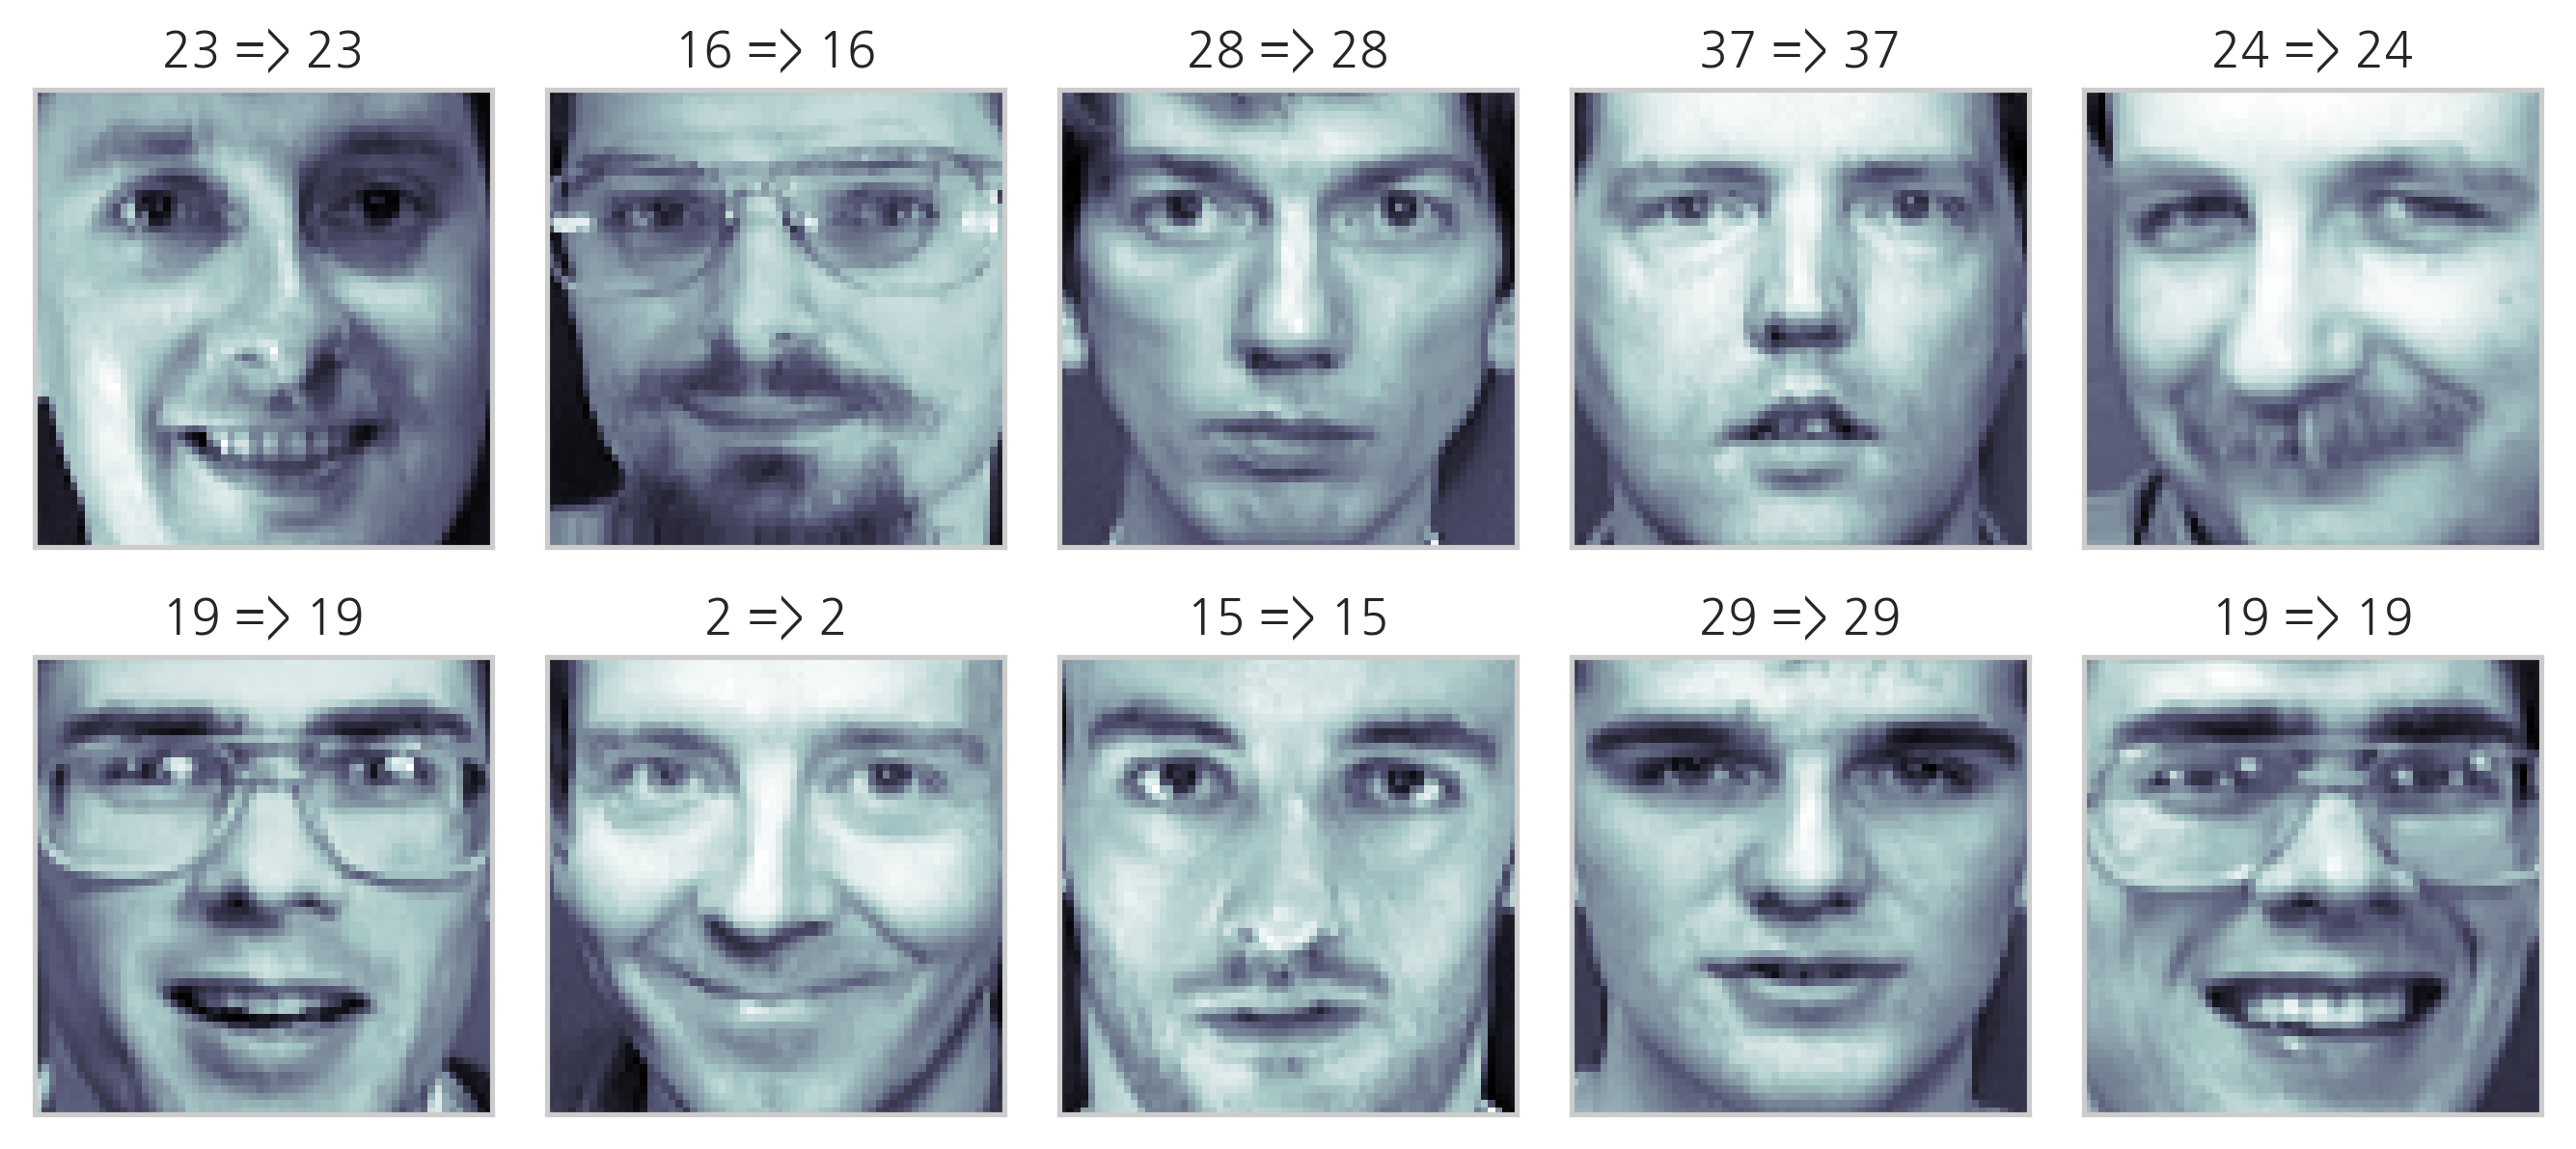

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.4, random_state=0)

from sklearn.svm import SVC
svc = SVC(kernel='linear').fit(X_train, y_train)

N = 2
M = 5
np.random.seed(4)
fig = plt.figure(figsize=(9, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(y_test)), N * M)
for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i * M + j + 1)
        ax.imshow(X_test[k:(k + 1), :].reshape(64, 64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("%d => %d" %
                  (y_test[k], svc.predict(X_test[k:(k + 1), :])[0]))
plt.tight_layout()
plt.show()

In [15]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

In [16]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         8
          17       1.00    

In [17]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4
           3       0.50      1.00      0.67         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         5
           6       0.83      0.83      0.83         6
           7       1.00      0.67      0.80         3
           8       0.67      1.00      0.80         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         4
          12       0.67      1.00      0.80         4
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         6
          15       1.00      0.33      0.50         6
          16       0.67      1.00      0.80         2
          17       1.00    